In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score

from sportsml.nba.data.utils import get_regular_season_games

In [3]:
games = get_regular_season_games()

In [4]:
# download from https://www.kaggle.com/datasets/ehallmar/nba-historical-stats-and-betting-data
spreads = pd.read_csv('data/nba_betting_spread.csv')

In [5]:
spreads = spreads.groupby(['game_id', 'team_id'])['spread1'].mean().reset_index()

In [6]:
games['spread_game_id'] = games['GAME_ID'].str.slice(2).astype(int)

In [7]:
df = spreads.merge(games, left_on=['game_id', 'team_id'], right_on=['spread_game_id', 'TEAM_ID'])

In [8]:
df['spread_win'] = df['spread1'] < 0
df['game_win'] = df['PLUS_MINUS'] > 0

<Axes: >

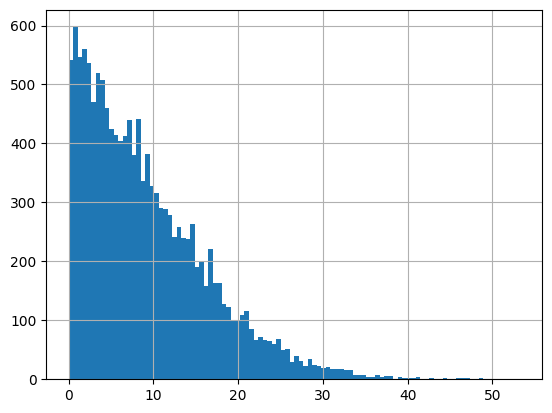

In [9]:
df['spread_err'] = (df['PLUS_MINUS'] + df['spread1']).abs()
df['spread_err'].hist(bins=100)

In [11]:
(df['spread_err'] < 3).mean()

0.21604493734696817

In [12]:
mean_absolute_error(-df['PLUS_MINUS'], df['spread1'])

9.210172315841694

In [13]:
mean_squared_error(-df['PLUS_MINUS'], df['spread1'], squared=False)

11.760340109409226

In [14]:
wl_mask = df['spread1'] != 0

In [15]:
accuracy_score(df.loc[wl_mask, 'game_win'], df.loc[wl_mask, 'spread_win'])

0.6887030495277918

In [16]:
recall_score(df.loc[wl_mask, 'game_win'], df.loc[wl_mask, 'spread_win'])

0.5134370579915134

In [17]:
precision_score(df.loc[wl_mask, 'game_win'], df.loc[wl_mask, 'spread_win'])

0.6496644295302013